In [1]:
from matplotlib.pyplot import show
from cv2 import cv2
import itertools
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
from IPython.display import clear_output
import sys

In [2]:
def show_img(img, colormode='gray'):
    dim = img.shape
    colormap = 'gray' if len(dim) < 3 else None
    colormode = 'L' if len(dim) < 3 else 'RGB'
    img = Image.fromarray(np.uint8(img), colormode)
    plt.imshow(img, colormap)
    plt.axis('off')
    plt.show()

In [3]:
def open_img(path):
    img_bgr2 = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
    return img_rgb

In [4]:
def kmean_segmentation(img, k):
    # SEGMENTACION
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    pixel_values = reduced.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # RECONSTRUCCION CON SEGMENTACION
    centers = np.uint8(centers)
    centers_og = centers.copy()
    sorted_idx = np.argsort(centers.sum(axis = 1))
    for i in range(len(centers)):
        if i < (k // 2):
            if i == 0:
                centers[sorted_idx[i]] = [255, 255, 255]
            else:
                centers[sorted_idx[i]] = [0, 0, 255]
    # centers[sorted_idx[0]] = [255, 255, 255]
    # centers[sorted_idx[1]] = [0, 0, 255]
    # centers[sorted_idx[2]] = [0, 0, 255]
    labels = labels.flatten()
    segmented_image = centers[labels.flatten()]

    # reshape back to the original image dimension
    segmented_image = segmented_image.reshape(reduced.shape)
    # show_img(segmented_image, 'L')
    return segmented_image, centers, centers_og

(-0.5, 325.5, 320.5, -0.5)

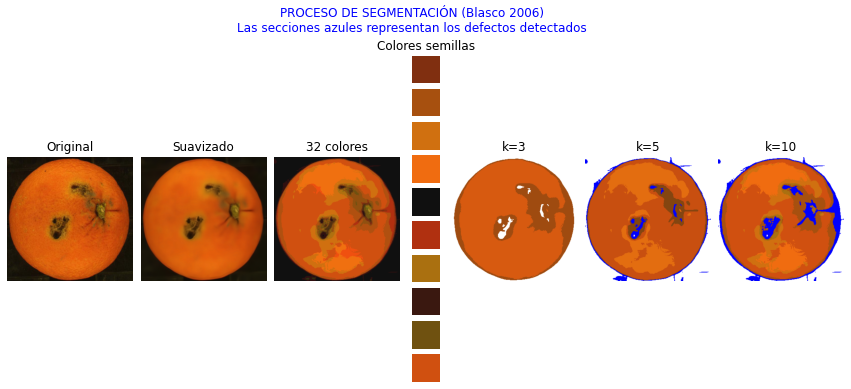

In [16]:
# ABRIR IMAGEN
path = 'orange_blasco.png'
k = 10
img = open_img(path)

# SUAVIZADO
dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 5, 12, 12)

# Reduccion de colores
div = 32
reduced = dst // div * div + div // 2

seg3, centers, centers_og = kmean_segmentation(reduced, 3)
seg5, centers, centers_og = kmean_segmentation(reduced, 5)
seg10, centers, centers_og = kmean_segmentation(reduced, 10)


# mostrar procesamiento
fig = plt.figure(constrained_layout=True, figsize = (15,6))
fig.suptitle('PROCESO DE SEGMENTACIÓN (Blasco 2006)\nLas secciones azules representan los defectos detectados', color = 'blue')
gs = fig.add_gridspec(10, (6 * 3) + 1)
# Original
f1 = fig.add_subplot(gs[:, 0:3])
f1.imshow(img)
f1.set_title("Original")
f1.axis('off')

# Suavizado
f2 = fig.add_subplot(gs[:,3:6])
f2.imshow(dst)
f2.set_title('Suavizado')
f2.axis('off')

# Reduced
f11 = fig.add_subplot(gs[:, 6:9])
f11.imshow(reduced)
f11.set_title('32 colores')
f11.axis('off')
grid_semillas = []
for i in range(len(centers_og)):
    grid_semillas.append(fig.add_subplot(gs[i, 9]))
    grid_semillas[i].imshow([[centers_og[i]]])
    grid_semillas[i].set_title('Colores semillas') if i == 0 else None
    grid_semillas[i].axis('off')

f3 = fig.add_subplot(gs[:, 10:13])
f3.imshow(seg3)
f3.set_title(f'k={3}')
f3.axis('off')

f4 = fig.add_subplot(gs[:, 13:16])
f4.imshow(seg5)
f4.set_title(f'k={5}')
f4.axis('off')

f5 = fig.add_subplot(gs[:, 16:19])
f5.imshow(seg10)
f5.set_title(f'k={10}')
f5.axis('off')